In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv(r'C:\Users\Tobi\Desktop\BI\Meteorite_Landings_20240212.csv', index_col=None, na_values=['NA'])
df.shape

(45716, 10)

In [3]:
list(df)

['name',
 'id',
 'nametype',
 'recclass',
 'mass (g)',
 'fall',
 'year',
 'reclat',
 'reclong',
 'GeoLocation']

In [8]:
df.isnull().sum()

name              0
id                0
nametype          0
recclass          0
mass (g)        131
fall              0
year            291
reclat         7315
reclong        7315
GeoLocation    7315
dtype: int64

Because of the large amount of missing data for recalt and reclong (7315 out of the total 45716 roughly 16%) I choice not to use the mean data from either reclat or reclong because I feared I would skew the results. For years and mass I did however use the mean data

In [9]:
mean_val = df["mass (g)"].mean()
df["mass (g)"] = df["mass (g)"].fillna(mean_val)

In [12]:
mean_val = df["year"].mean()
df["year"] = df["year"].fillna(mean_val)

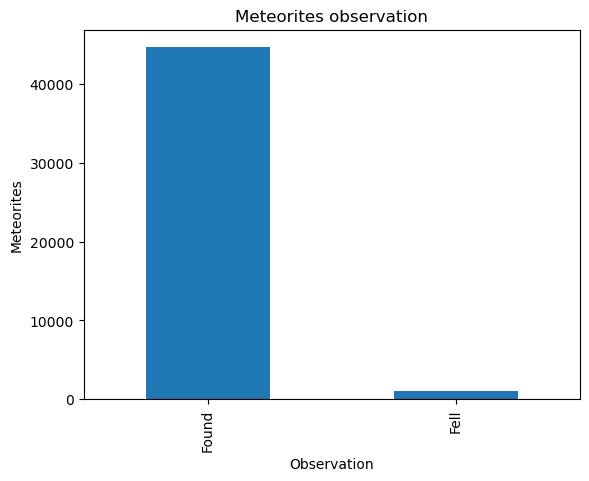

In [16]:
df['fall'].value_counts().plot(kind='bar')

plt.title('Meteorites observation')
plt.ylabel('Meteorites')
plt.xlabel('Observation')
plt.show()

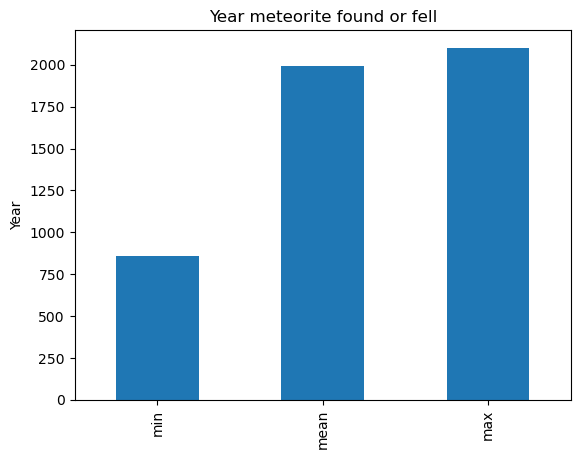

In [19]:
stats = df['year'].describe()
summary = stats[['min', 'mean', 'max']]
summary.plot(kind='bar')
plt.title('Year observed')
plt.ylabel('Year')
plt.show()

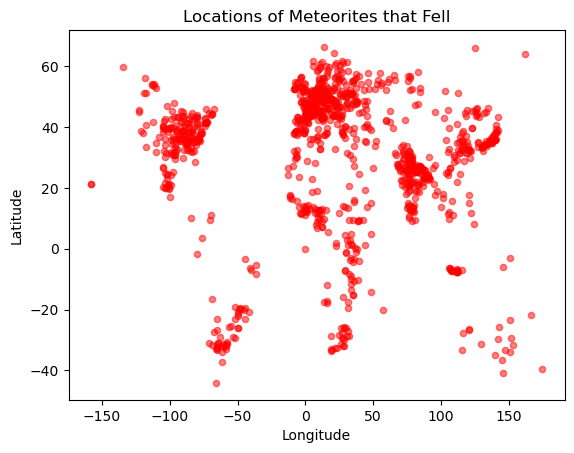

In [35]:
df_fell.plot.scatter(x="reclong", y="reclat", alpha=0.5, c="red")
plt.title("Meteorite Locations: Fell")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


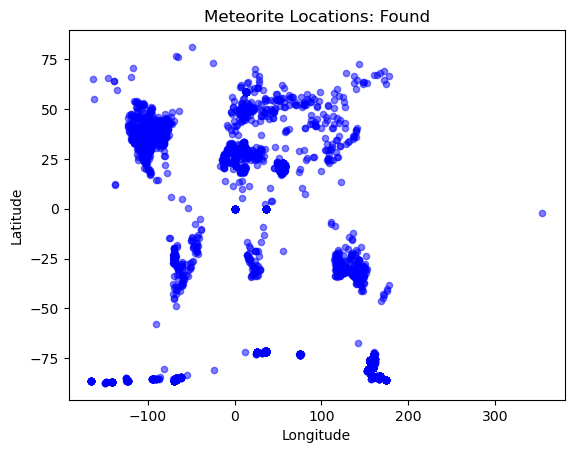

In [40]:
df_found = df[df["fall"] == "Found"]
df_found.plot.scatter(
    x="reclong",
    y="reclat",
    color="blue",
    alpha=0.5
)
plt.title("Meteorite Locations: Found")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

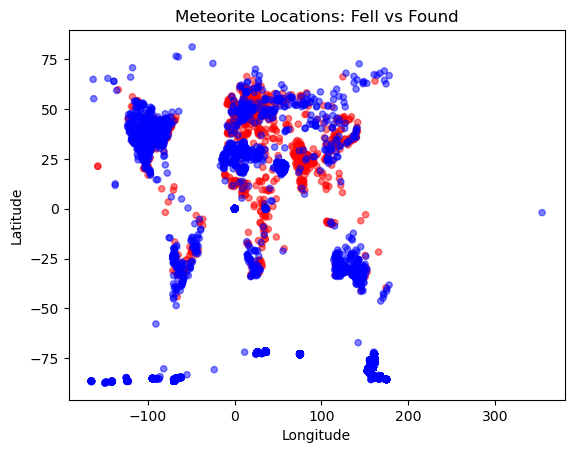

In [31]:
df.plot.scatter(
    x="reclong",
    y="reclat",
    c=df["fall"].map({"Fell": "red", "Found": "blue"}),
    alpha=0.5
)

plt.title("Meteorite Locations: Fell vs Found")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()
